In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import mnist

%matplotlib inline

In [2]:
tf.keras.backend.clear_session()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

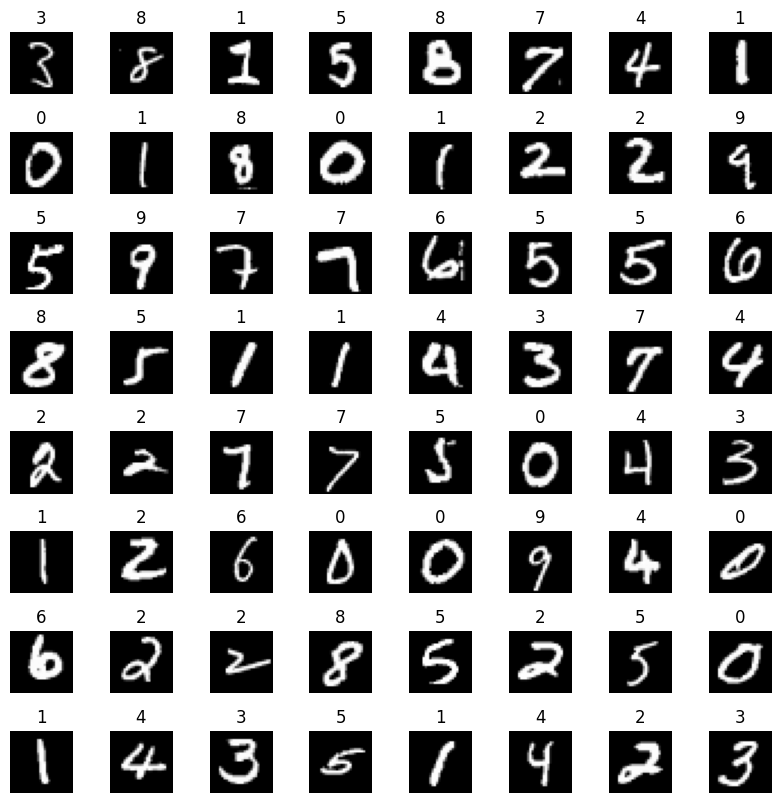

In [6]:
m = X_train.shape[0]; n = X_train.shape[1]

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(m)

    X_train_random = X_train[idx].reshape((28, 28))

    ax.imshow(X_train_random, cmap='gray')

    ax.set_title(y_train[idx])
    ax.set_axis_off()

In [7]:
def create_model(optimizer='adam', learning_rate=0.001, hidden_units1=25, hidden_units2=15):
    model = Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(hidden_units1, activation='relu'),
        Dense(hidden_units2, activation='relu'),
        Dense(10, activation='softmax')
    ], name='Digit_Model')

    # Use optimizer as a string or instantiate with learning_rate
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = optimizer  # Fallback to string or default

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=opt,
        metrics=['accuracy']
    )
    return model

In [8]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(model=create_model, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

In [9]:
param_grid = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__learning_rate': [0.0001, 0.001, 0.01, 0.1],  # Range of learning rates
    'model__hidden_units1': [20, 25, 30, 40, 50],
    'model__hidden_units2': [10, 15, 20, 25],
    'epochs': [5, 10, 15],
    'batch_size': [16, 32, 64]
}

In [10]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    n_jobs=1,
    random_state=42  # For reproducibility
)

# Fit the model with error handling
try:
    random_search.fit(X_train, y_train)
    print("Best parameters:", random_search.best_params_)
    print("Best score:", random_search.best_score_)
except Exception as e:
    print(f"Error occurred: {e}")

Best parameters: {'model__optimizer': 'adam', 'model__learning_rate': 0.001, 'model__hidden_units2': 25, 'model__hidden_units1': 30, 'epochs': 10, 'batch_size': 32}
Best score: 0.9112500000000001


In [11]:
# Extract best parameters
best_params = random_search.best_params_

final_model = KerasClassifier(
    model=create_model,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    validation_split=0.2,
    verbose=1,
    model__optimizer=best_params['model__optimizer'],
    model__learning_rate=best_params['model__learning_rate'],
    model__hidden_units1=best_params['model__hidden_units1'],
    model__hidden_units2=best_params['model__hidden_units2']
)

# Fit the final model on the full training data
try:
    final_model.fit(X_train, y_train)
    print("Final model training completed.")
except Exception as e:
    print(f"Error during final model fitting: {e}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4602 - loss: 3.8619 - val_accuracy: 0.7036 - val_loss: 0.9316
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7761 - loss: 0.7515 - val_accuracy: 0.8650 - val_loss: 0.5384
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8703 - loss: 0.5018 - val_accuracy: 0.8897 - val_loss: 0.4640
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8867 - loss: 0.4324 - val_accuracy: 0.8904 - val_loss: 0.4421
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8965 - loss: 0.3933 - val_accuracy: 0.8956 - val_loss: 0.4199
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9014 - loss: 0.3691 - val_accuracy: 0.9013 - val_loss: 0.4089
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9047 - loss: 0.3609 - val_accuracy: 0.9112 - val_loss: 0.3320
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 0.3280 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

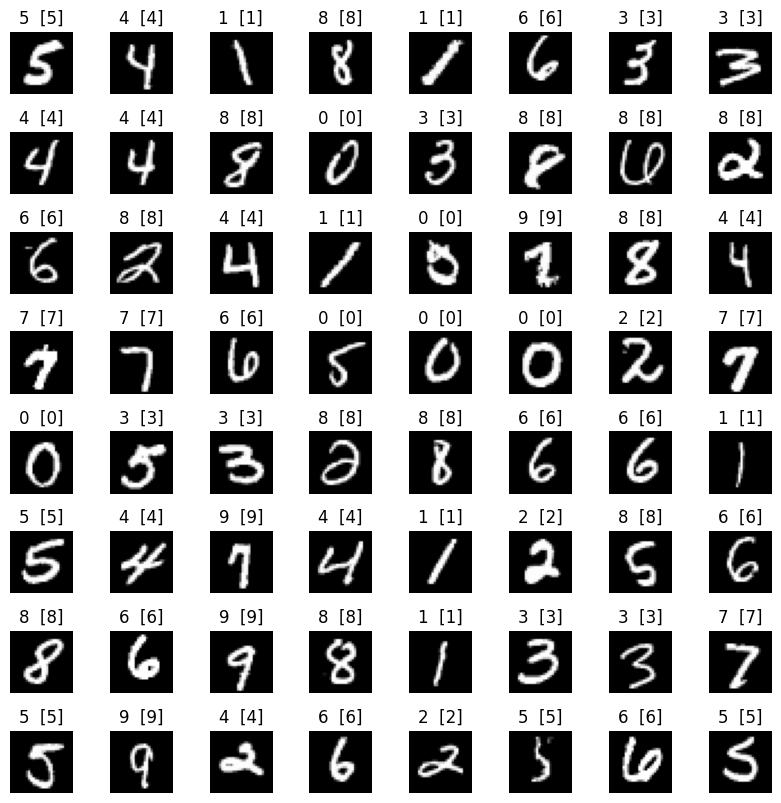

In [75]:
m = X_test.shape[0]; n = X_test.shape[1]

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(m)

    X_test_random = X_test[idx].reshape((28, 28))
    
    ax.imshow(X_test_random, cmap='gray')

    logits = final_model.model_(X_test[idx].reshape(1, 784))
    
    y_hat = tf.nn.softmax(logits)
    y_hat = tf.argmax(logits, axis=1)

    ax.set_title(f'{y_hat.numpy()[0]}  {final_model.predict(X_test[idx].reshape(1, 784))}')
    ax.set_axis_off()

In [143]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Step 1: Load the image
    img = Image.open(image_path)
    
    # Step 2: Convert to grayscale
    img = img.convert('L')  # Grayscale
    
    # Step 5: Resize to 28x28
    img = img.resize((28, 28))
    
    # Step 6: Convert to numpy array and normalize
    img_array = np.array(img)
    img_array = 255 - img_array
    
    # Step 7: Invert colors (MNIST: white digit on black background)
    img_array = 1.0 - img_array
    
    # Step 8: Reshape for model input
    img_array = img_array.reshape(1, 784)  # Flattened for model

    img_array = img_array.astype('uint8')
    

    return img_array

# Load and preprocess
image_path = './data/6.jpg'  # Replace with your JPG file path
processed_image = preprocess_image(image_path)

# Assuming final_model is your model
pred = final_model.predict(processed_image)
print(f"Predicted digit: {pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 6


In [144]:
def plot_image(img_array, title="Processed Image"):
    img_2d = img_array.reshape(28, 28)
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img_2d, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

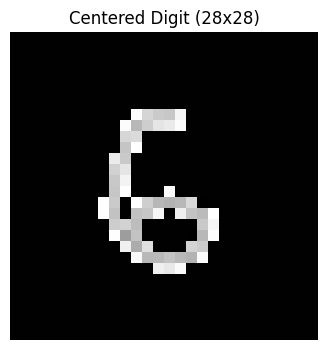

In [145]:
# Plot the processed image
plot_image(processed_image, title="Centered Digit (28x28)")